<a href="https://colab.research.google.com/github/Vishakhatu/FMMLprojectandlab/blob/main/Module_9_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

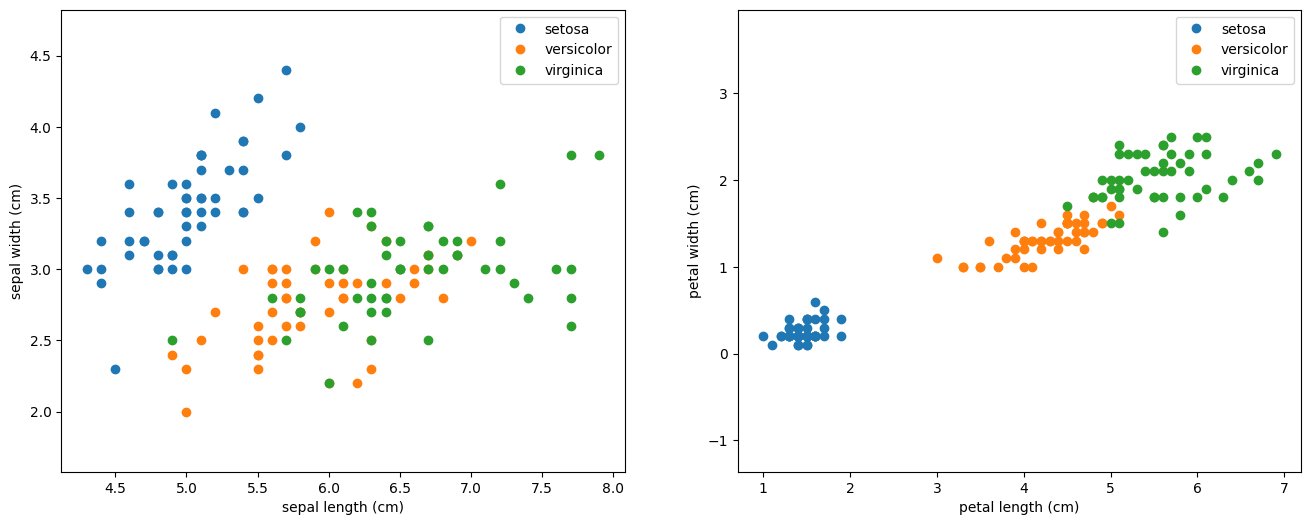

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:01<00:00, 98.27it/s]


# Plot training progress

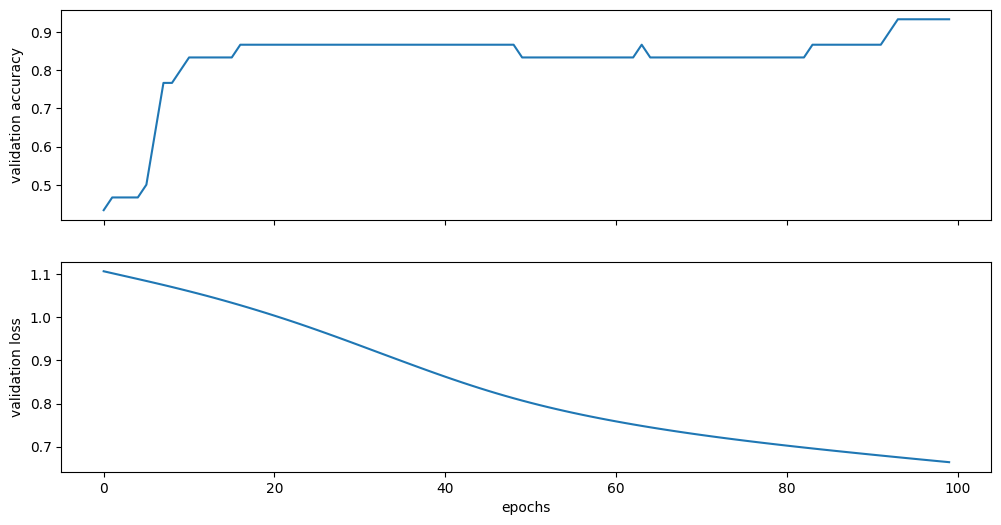

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

## **ans1**
Adding or modifying hidden layers in a neural network can significantly impact its performance and learning dynamics. Here, the given model has two hidden layers, each with 50 units. Let's experiment with changing the number of hidden layers:

Adding more hidden layers: We can add one or more hidden layers to the network architecture.
Removing hidden layers: We can remove one or both hidden layers from the network.
Let's explore these scenarios:

Experiment 1: Adding more hidden layers

In [ ]:
class ModelWithMoreLayers(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithMoreLayers, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)  # Additional hidden layer
        self.layer4 = nn.Linear(50, 3)   # Output layer

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))       # Activation added for the new layer
        x = F.softmax(self.layer4(x), dim=1)
        return x


Experiment 2: Removing hidden layers

In [ ]:
class ModelWithFewerLayers(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithFewerLayers, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 3)   # Output layer, hidden layer removed

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=1)
        return x


# **Ans 2**

100%|██████████| 100/100 [00:00<00:00, 336.01it/s]


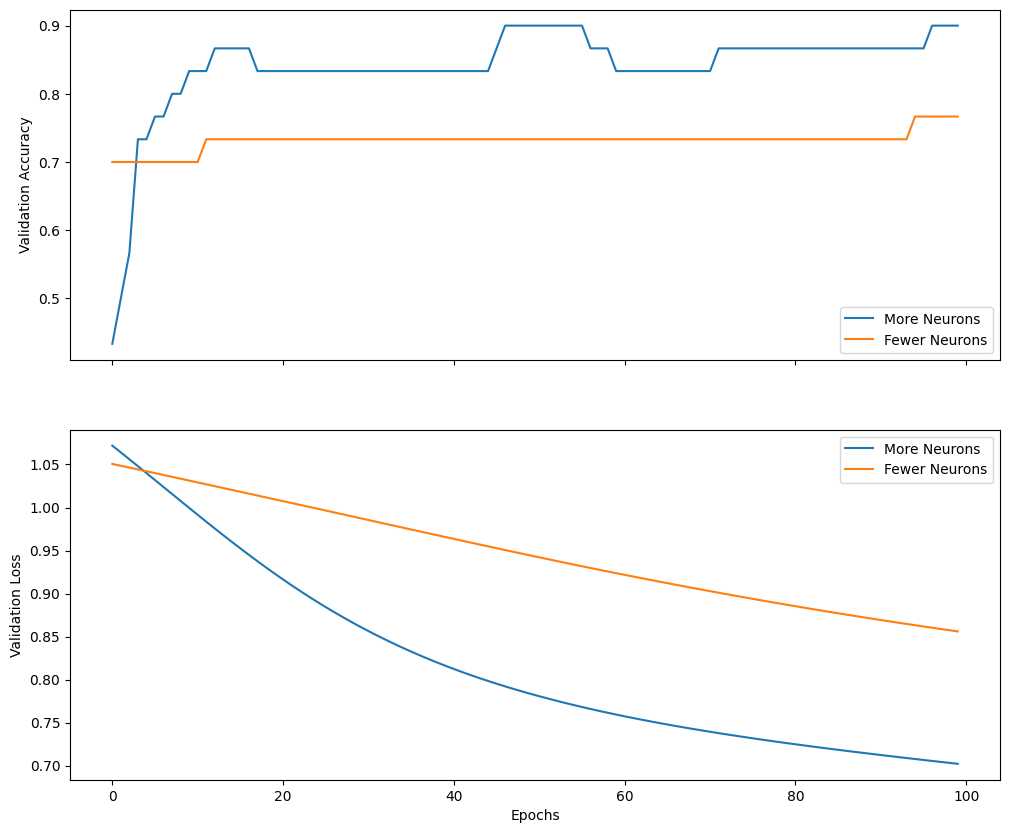

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architectures for experiments

# Experiment 1: Increasing the number of neurons in the hidden layer
class ModelWithMoreNeurons(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithMoreNeurons, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)  # Increased number of neurons
        self.layer2 = nn.Linear(100, 3)          # Output layer

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=1)
        return x

# Experiment 2: Decreasing the number of neurons in the hidden layer
class ModelWithFewerNeurons(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithFewerNeurons, self).__init__()
        self.layer1 = nn.Linear(input_dim, 20)   # Reduced number of neurons
        self.layer2 = nn.Linear(20, 3)           # Output layer

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=1)
        return x

# Instantiating the models, using Adam optimizer, and Cross Entropy Loss

# Experiment 1: Increasing the number of neurons
model_more_neurons = ModelWithMoreNeurons(X_train.shape[1])

# Experiment 2: Decreasing the number of neurons
model_fewer_neurons = ModelWithFewerNeurons(X_train.shape[1])

optimizer_more_neurons = torch.optim.Adam(model_more_neurons.parameters(), lr=0.001)
optimizer_fewer_neurons = torch.optim.Adam(model_fewer_neurons.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

# Train the models

# Train for 100 epochs
EPOCHS = 100
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)

loss_list_more_neurons = np.zeros((EPOCHS,))
accuracy_list_more_neurons = np.zeros((EPOCHS,))

loss_list_fewer_neurons = np.zeros((EPOCHS,))
accuracy_list_fewer_neurons = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    # Training with more neurons model
    y_pred_more_neurons = model_more_neurons(X_train)
    loss_more_neurons = loss_fn(y_pred_more_neurons, y_train)
    loss_list_more_neurons[epoch] = loss_more_neurons.item()

    optimizer_more_neurons.zero_grad()
    loss_more_neurons.backward()
    optimizer_more_neurons.step()

    # Training with fewer neurons model
    y_pred_fewer_neurons = model_fewer_neurons(X_train)
    loss_fewer_neurons = loss_fn(y_pred_fewer_neurons, y_train)
    loss_list_fewer_neurons[epoch] = loss_fewer_neurons.item()

    optimizer_fewer_neurons.zero_grad()
    loss_fewer_neurons.backward()
    optimizer_fewer_neurons.step()

    # Validation
    with torch.no_grad():
        # For more neurons model
        y_pred_val_more_neurons = model_more_neurons(X_test)
        correct_more_neurons = (torch.argmax(y_pred_val_more_neurons, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_more_neurons[epoch] = correct_more_neurons.mean()

        # For fewer neurons model
        y_pred_val_fewer_neurons = model_fewer_neurons(X_test)
        correct_fewer_neurons = (torch.argmax(y_pred_val_fewer_neurons, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_fewer_neurons[epoch] = correct_fewer_neurons.mean()

# Plot training progress for both experiments

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10), sharex=True)

ax1.plot(accuracy_list_more_neurons, label='More Neurons')
ax1.plot(accuracy_list_fewer_neurons, label='Fewer Neurons')
ax1.set_ylabel("Validation Accuracy")
ax1.legend()

ax2.plot(loss_list_more_neurons, label='More Neurons')
ax2.plot(loss_list_fewer_neurons, label='Fewer Neurons')
ax2.set_ylabel("Validation Loss")
ax2.set_xlabel("Epochs")
ax2.legend()

plt.show()



# **Ans 3**

100%|██████████| 100/100 [00:00<00:00, 514.19it/s]


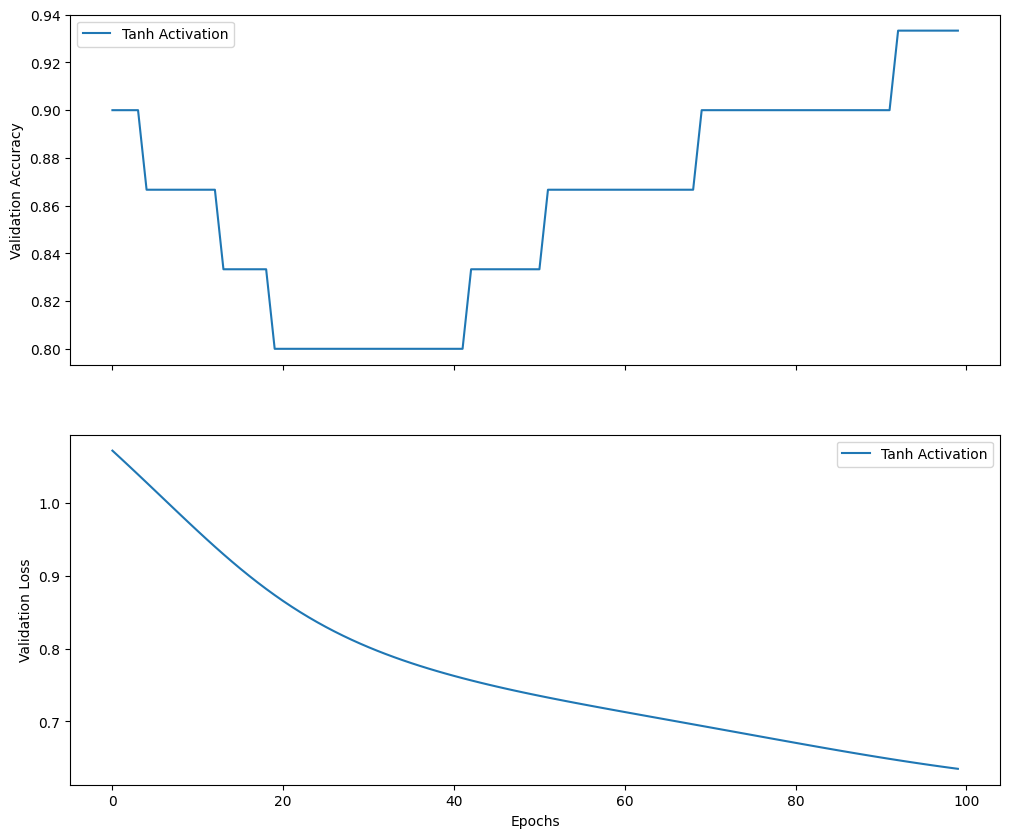

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Defining the model architecture with a different activation function

class ModelWithTanhActivation(nn.Module):
    def __init__(self, input_dim):
        super(ModelWithTanhActivation, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))  # Using Tanh activation function
        x = torch.tanh(self.layer2(x))  # Using Tanh activation function
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiating the model with Tanh activation function
model_tanh_activation = ModelWithTanhActivation(X_train.shape[1])

optimizer_tanh_activation = torch.optim.Adam(model_tanh_activation.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

# Train the model

# Train for 100 epochs
EPOCHS = 100
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)

loss_list_tanh_activation = np.zeros((EPOCHS,))
accuracy_list_tanh_activation = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    # Training with Tanh activation function
    y_pred_tanh_activation = model_tanh_activation(X_train)
    loss_tanh_activation = loss_fn(y_pred_tanh_activation, y_train)
    loss_list_tanh_activation[epoch] = loss_tanh_activation.item()

    optimizer_tanh_activation.zero_grad()
    loss_tanh_activation.backward()
    optimizer_tanh_activation.step()

    # Validation
    with torch.no_grad():
        y_pred_val_tanh_activation = model_tanh_activation(X_test)
        correct_tanh_activation = (torch.argmax(y_pred_val_tanh_activation, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list_tanh_activation[epoch] = correct_tanh_activation.mean()

# Plot training progress with Tanh activation function

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10), sharex=True)

ax1.plot(accuracy_list_tanh_activation, label='Tanh Activation')
ax1.set_ylabel("Validation Accuracy")
ax1.legend()

ax2.plot(loss_list_tanh_activation, label='Tanh Activation')
ax2.set_ylabel("Validation Loss")
ax2.set_xlabel("Epochs")
ax2.legend()

plt.show()


# **Obsevation:-**
**Multiclass Classification on Iris Dataset:**
For this problem, we need to consider the relevance of activation functions in training a neural network for multiclass classification. The observations provided are indeed relevant here as they discuss how different activation functions can impact training dynamics and model performance.

**Changing the Number of Hidden Layers:**
While changing the number of hidden layers is primarily an architectural change, the choice of activation function within those layers can influence the effectiveness of the network. Considering the impact of activation functions on training dynamics and model performance is crucial when evaluating the effects of changing the number of hidden layers.

**Changing the Number of Neurons in the Hidden Layer**:
Similar to changing the number of hidden layers, the choice of activation function interacts with the number of neurons in the hidden layer. Thus, understanding how different activation functions behave with varying numbers of neurons is relevant for this problem statement.

**Using a Different Activation Function:**
This problem statement directly focuses on exploring the impact of different activation functions. The observations provided specifically address this problem statement.
Upon reconsideration, the observations provided seem relevant to all the problem statements you've given. They touch upon crucial aspects such as training dynamics, model performance, and overfitting, which are applicable across various scenarios involving neural networks and activation functions.